In [1235]:
import skfda
from skfda.datasets import fetch_weather, fetch_growth, fetch_aemet, fetch_tecator
import matplotlib.pyplot as plt
import numpy as np
from skfda.exploratory.depth import ModifiedBandDepth, IntegratedDepth, DistanceBasedDepth, BandDepth
from skfda.exploratory.visualization import Boxplot, MagnitudeShapePlot
from skfda.exploratory.visualization.fpca import FPCAPlot
from skfda.misc.metrics import l2_distance
from skfda.ml.clustering import KMeans
from skfda.preprocessing.dim_reduction import FPCA
from skfda import datasets
from skfda.exploratory.depth import IntegratedDepth
from skfda.exploratory.depth.multivariate import SimplicialDepth, ProjectionDepth
from skfda.exploratory.visualization import MagnitudeShapePlot
from sklearn.model_selection import train_test_split
from skfda.ml.regression import KNeighborsRegressor
from skfda.representation.basis import FourierBasis
from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans
from sklearn.model_selection import GridSearchCV, train_test_split

import skfda
from skfda.ml.classification import KNeighborsClassifier

In [1236]:
X, y = fetch_weather(return_X_y=True, as_frame=True)
fd = X.iloc[:, 0].values
fd_temperatures = fd.coordinates[0]
target = y.values




In [1237]:
X.head(5)

,daily averages,place,province,latitude,longitude,index,monthly temperatures,monthly precipitation
0,Data set: [[[-3.6 5.2] [-3.1 5.8] [-3...,St. Johns,Newfoundland,47.34,52.43,24.0,"[-4.65483870967742, -5.325, -2.53225806451613,...","[4.65161290322581, 4.73571428571429, 4.2354838..."
1,Data set: [[[-4.4 6. ] [-4.2 5.3] [-5...,Halifax,Nova Scotia,44.39,63.36,9.0,"[-6.15806451612903, -6.18214285714286, -1.7387...","[4.63225806451613, 4.14642857142857, 4.1354838..."
2,Data set: [[[-3.8 5.3] [-3.5 5.2] [-4...,Sydney,Nova Scotia,46.09,60.11,25.0,"[-5.72258064516129, -6.79642857142857, -2.9354...","[4.76451612903226, 4.44642857142857, 4.4225806..."
3,Data set: [[[-1.4 5.6] [-1.6 3.7] [-2...,Yarmouth,Nova Scotia,43.50,66.07,34.0,"[-3.21612903225806, -3.48928571428571, 0.15161...","[4.02258064516129, 3.63928571428571, 3.3096774..."
4,Data set: [[[ -5.8 4.6] [ -5.6 4.4] ...,Charlottvl,Ontario,42.48,80.25,4.0,"[-8.11290322580645, -8.2607142857143, -3.44193...","[3.42903225806452, 3.23214285714286, 3.0290322..."


In [1238]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   daily averages         35 non-null     FDataGrid
 1   place                  35 non-null     object   
 2   province               35 non-null     object   
 3   latitude               35 non-null     float64  
 4   longitude              35 non-null     float64  
 5   index                  35 non-null     float64  
 6   monthly temperatures   35 non-null     object   
 7   monthly precipitation  35 non-null     object   
dtypes: FDataGrid(1), float64(3), object(4)
memory usage: 204.5+ KB


In [1239]:
target

['Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', 'Atlantic', ..., 'Continental', 'Continental', 'Arctic', 'Arctic', 'Arctic']
Length: 35
Categories (4, object): ['Arctic', 'Atlantic', 'Continental', 'Pacific']

C:\Users\kevin\AppData\Local\Temp\ipykernel_24008\3226053007.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('seismic')


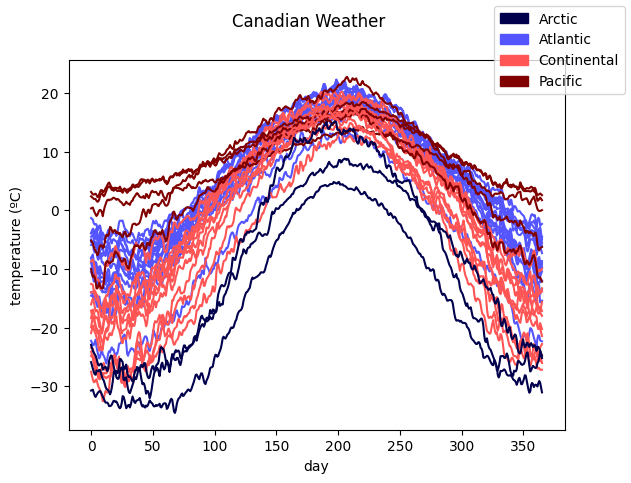

In [1240]:
colormap = plt.cm.get_cmap('seismic')
label_names = y.values.categories
nlabels = len(label_names)
label_colors = colormap(np.arange(nlabels) / (nlabels - 1))

fd_temperatures.plot(group=y.values.codes,
                     group_colors=label_colors,
                     group_names=label_names)
plt.show()

## Sacando la Media

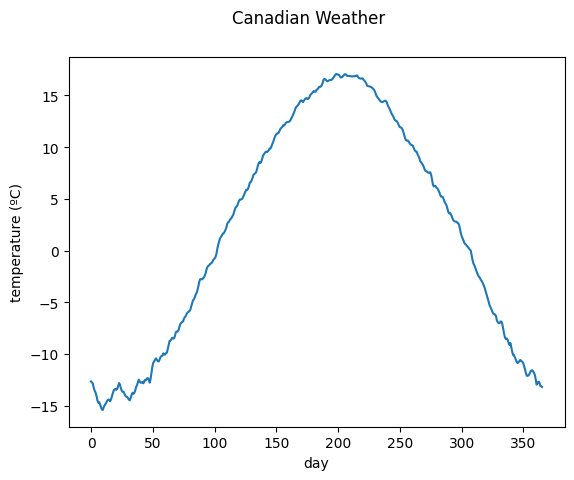

In [1241]:
mean_low = skfda.exploratory.stats.mean(fd_temperatures)
mean_low.plot()
plt.show()



## Mediana por profundidad

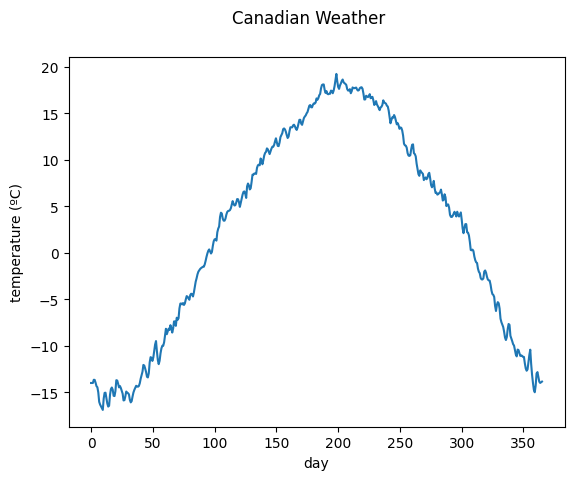

In [1242]:
depth_median = skfda.exploratory.stats.depth_based_median(fd_temperatures)
depth_median.plot()
plt.show()

### Mediana Geometrica


In [1243]:
median = skfda.exploratory.stats.geometric_median(fd_temperatures)

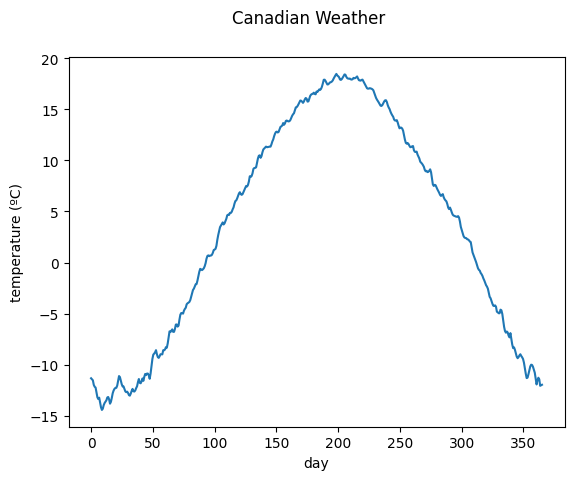

In [1244]:
median.plot()
plt.show()

## Detección de outleirs

### Boxplot Outlier Detector

#### Temperatura

In [1245]:

out_detector = skfda.exploratory.outliers.BoxplotOutlierDetector()
outliers_T = out_detector.fit_predict(fd_temperatures)
outliers_T

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1])

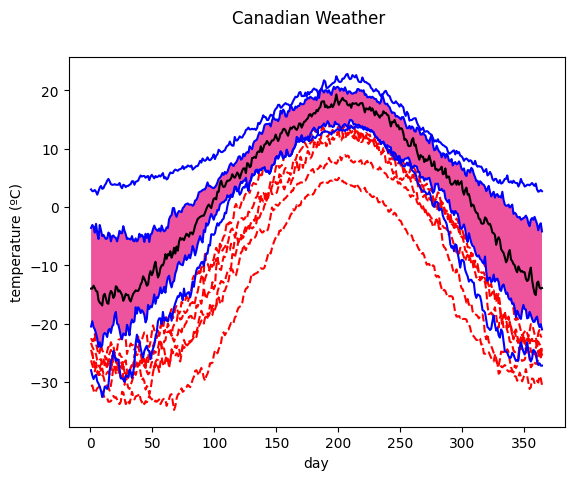

In [1246]:
fdBoxplot = Boxplot(fd_temperatures)
fdBoxplot.show_full_outliers = True
fdBoxplot.plot()
plt.show()

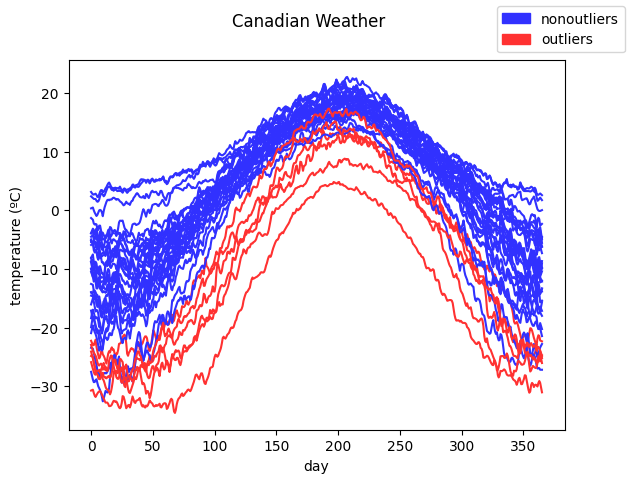

In [1247]:
color = 0.3
outliercol = 0.7

fd_temperatures.plot(group=fdBoxplot.outliers.astype(int),
                     group_colors=colormap([color, outliercol]),
                     group_names=["nonoutliers", "outliers"])
plt.show()

ModifiedBandDepth

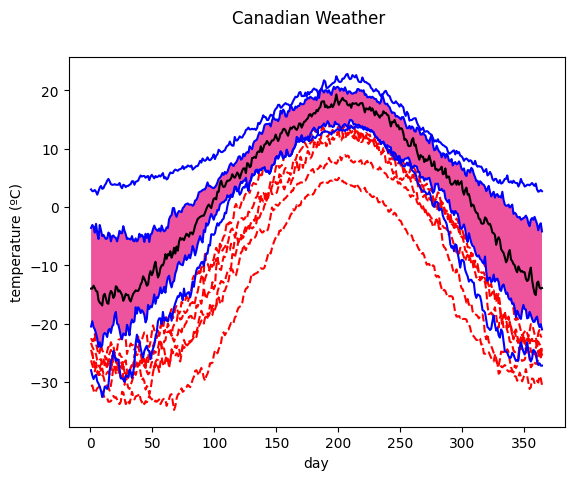

In [1248]:
fdBoxplot = Boxplot(
    fd_temperatures, depth_method=ModifiedBandDepth())
fdBoxplot.show_full_outliers = True

fdBoxplot.plot()
plt.show()


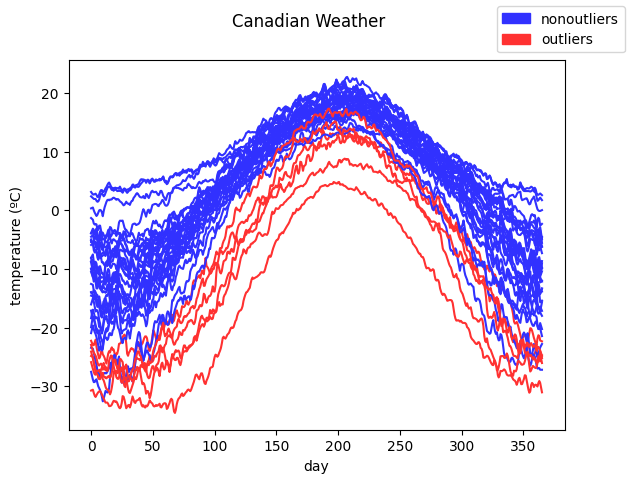

In [1249]:
color = 0.3
outliercol = 0.7

fd_temperatures.plot(group=fdBoxplot.outliers.astype(int),
                     group_colors=colormap([color, outliercol]),
                     group_names=["nonoutliers", "outliers"])
plt.show()

DistanceBaseDepth

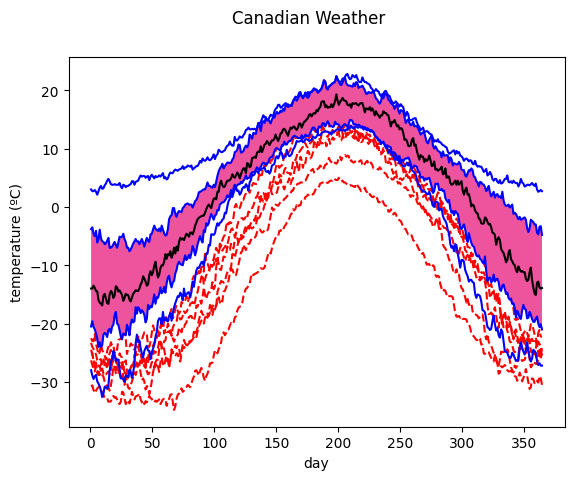

In [1250]:
fdBoxplot = Boxplot(
    fd_temperatures, depth_method=DistanceBasedDepth())
fdBoxplot.show_full_outliers = True

fdBoxplot.plot()
plt.show()


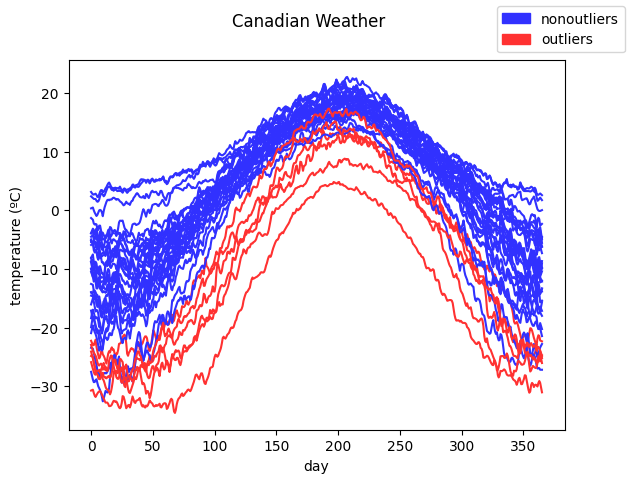

In [1251]:
color = 0.3
outliercol = 0.7

fd_temperatures.plot(group=fdBoxplot.outliers.astype(int),
                     group_colors=colormap([color, outliercol]),
                     group_names=["nonoutliers", "outliers"])
plt.show()

### MSPlotOutlierDetector

ProjectionDepth

In [1252]:
outdetector = skfda.exploratory.outliers.MSPlotOutlierDetector()

outliers_MS_1 = outdetector.fit_predict(fd_temperatures)
outliers_MS_1

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
       -1])

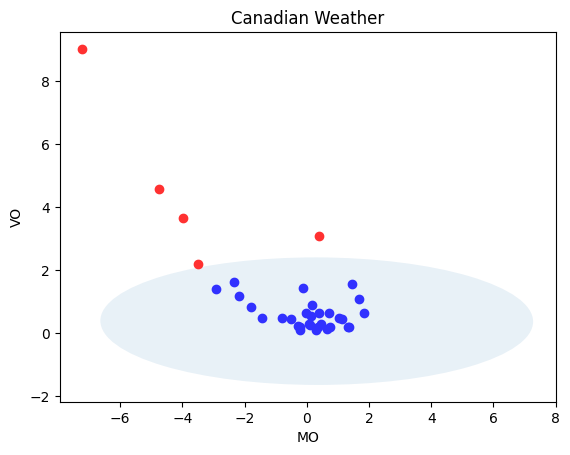

In [1253]:
msplot = MagnitudeShapePlot(
    fd_temperatures,
    multivariate_depth=ProjectionDepth(),
)

color = 0.3
outliercol = 0.7

msplot.color = color
msplot.outliercol = outliercol
msplot.plot()
plt.show()

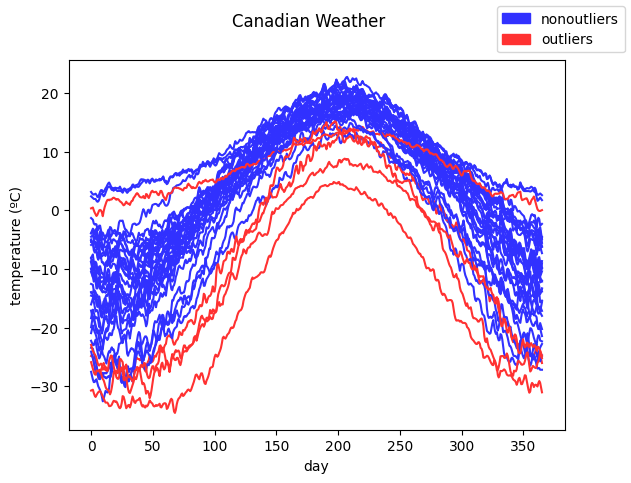

In [1254]:
fd_temperatures.plot(
    group=msplot.outliers.astype(int),
    group_colors=msplot.colormap([color, outliercol]),
    group_names=['nonoutliers', 'outliers'],
)
plt.show()

SimplicialDepth

In [1255]:
outdetector = skfda.exploratory.outliers.MSPlotOutlierDetector(multivariate_depth=SimplicialDepth())

outliers_MS_2 = outdetector.fit_predict(fd_temperatures)
outliers_MS_2

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1])

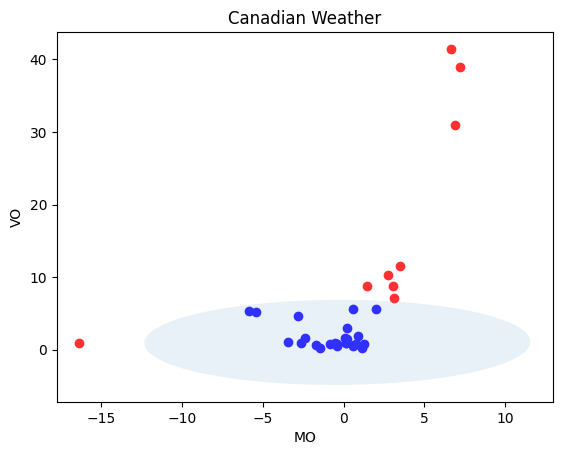

In [1256]:
msplot = MagnitudeShapePlot(
    fd_temperatures,
    multivariate_depth=SimplicialDepth(),
)

color = 0.3
outliercol = 0.7

msplot.color = color
msplot.outliercol = outliercol
msplot.plot()
plt.show()

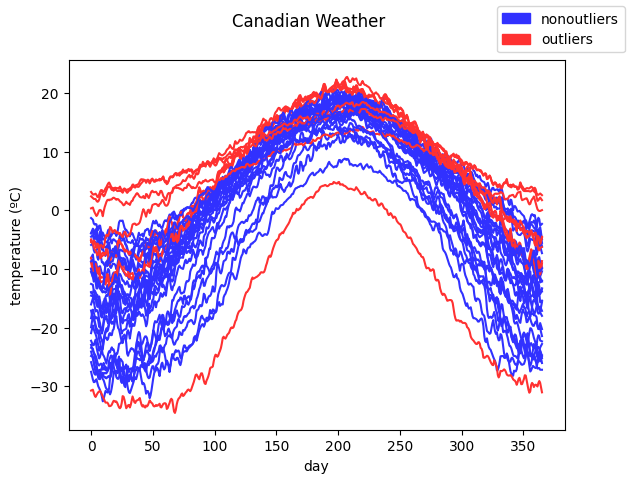

In [1257]:
fd_temperatures.plot(
    group=msplot.outliers.astype(int),
    group_colors=msplot.colormap([color, outliercol]),
    group_names=['nonoutliers', 'outliers'],
)
plt.show()

In [1258]:
outdetector = skfda.exploratory.outliers.MSPlotOutlierDetector(multivariate_depth=IntegratedDepth().multivariate_depth)

outliers_MS_3 = outdetector.fit_predict(fd_temperatures)
outliers_MS_3

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
       -1])

<function matplotlib.pyplot.show(close=None, block=None)>

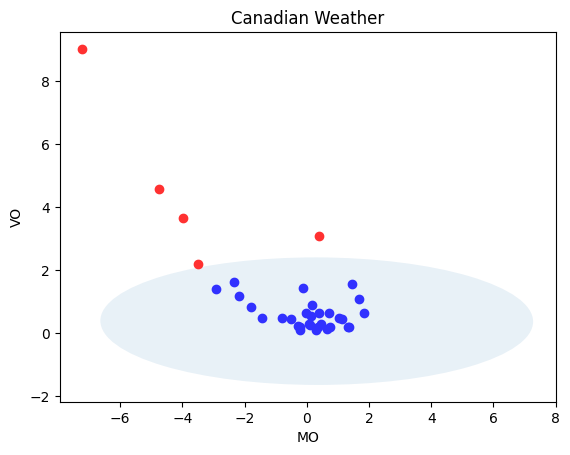

In [1259]:
msplot = MagnitudeShapePlot(
    fd_temperatures,
    multivariate_depth=IntegratedDepth().multivariate_depth,
)

msplot.color = color
msplot.outliercol = outliercol
msplot.plot()
plt.show

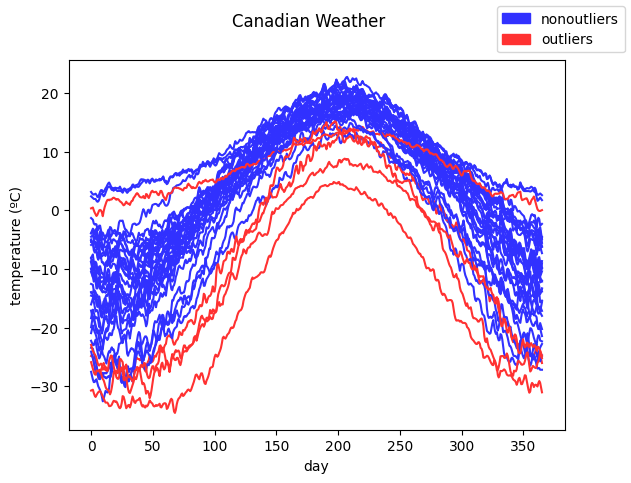

In [1260]:
fd_temperatures.plot(
    group=msplot.outliers.astype(int),
    group_colors=msplot.colormap([color, outliercol]),
    group_names=['nonoutliers', 'outliers'],
)
plt.show()

## Outliergram

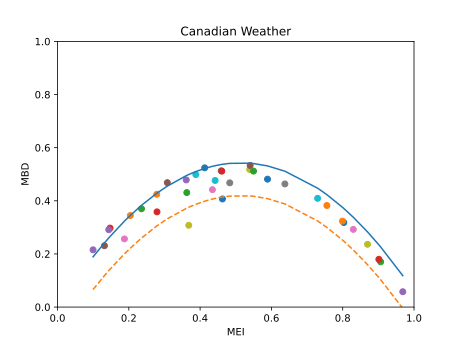

In [1261]:

skfda.exploratory.visualization.Outliergram(fd_temperatures)





## Modelado

In [1262]:
X['outliers_boxplot'] = outliers_T
X.head(2)

,daily averages,place,province,latitude,longitude,index,monthly temperatures,monthly precipitation,outliers_boxplot
0,Data set: [[[-3.6 5.2] [-3.1 5.8] [-3...,St. Johns,Newfoundland,47.34,52.43,24.0,"[-4.65483870967742, -5.325, -2.53225806451613,...","[4.65161290322581, 4.73571428571429, 4.2354838...",1
1,Data set: [[[-4.4 6. ] [-4.2 5.3] [-5...,Halifax,Nova Scotia,44.39,63.36,9.0,"[-6.15806451612903, -6.18214285714286, -1.7387...","[4.63225806451613, 4.14642857142857, 4.1354838...",1


In [1263]:
X_1 = X[X['outliers_boxplot']==1]
X_1.head(2)

,daily averages,place,province,latitude,longitude,index,monthly temperatures,monthly precipitation,outliers_boxplot
0,Data set: [[[-3.6 5.2] [-3.1 5.8] [-3...,St. Johns,Newfoundland,47.34,52.43,24.0,"[-4.65483870967742, -5.325, -2.53225806451613,...","[4.65161290322581, 4.73571428571429, 4.2354838...",1
1,Data set: [[[-4.4 6. ] [-4.2 5.3] [-5...,Halifax,Nova Scotia,44.39,63.36,9.0,"[-6.15806451612903, -6.18214285714286, -1.7387...","[4.63225806451613, 4.14642857142857, 4.1354838...",1


In [1264]:
target_codes = target.codes
target_codes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0], dtype=int8)

In [1265]:
X_train, X_test, y_train, y_test = train_test_split(
    fd_temperatures,
    target_codes,
    test_size=0.25,
    stratify=y,
    random_state=0,
)

In [1266]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [1267]:
pred = knn.predict(X_test)
print(pred)

[1 1 2 1 1 2 1 2 1]


In [1268]:
score = knn.score(X_test, y_test)
print(score)

0.6666666666666666


### sin outliers boxplot

In [1269]:
fd = X_1.iloc[:, 0].values

fd_temperatures = fd.coordinates[0]
target = y[X_1.index].values

In [1270]:
target_codes = target.codes
target_codes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 2, 2], dtype=int8)

In [1271]:
X_train, X_test, y_train, y_test = train_test_split(
    fd_temperatures,
    target_codes,
    test_size=0.25,
    stratify=target_codes,
    random_state=0,
)

In [1272]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [1273]:
pred = knn.predict(X_test)
print(pred)

[1 2 1 1 1 1 2 1]


In [1274]:
score = knn.score(X_test, y_test)
print(score)

0.75


Con el MSPLOT_1

In [1275]:
X['outliers_MS'] = outliers_MS_1
X.head(2)

,daily averages,place,province,latitude,longitude,index,monthly temperatures,monthly precipitation,outliers_boxplot,outliers_MS
0,Data set: [[[-3.6 5.2] [-3.1 5.8] [-3...,St. Johns,Newfoundland,47.34,52.43,24.0,"[-4.65483870967742, -5.325, -2.53225806451613,...","[4.65161290322581, 4.73571428571429, 4.2354838...",1,1
1,Data set: [[[-4.4 6. ] [-4.2 5.3] [-5...,Halifax,Nova Scotia,44.39,63.36,9.0,"[-6.15806451612903, -6.18214285714286, -1.7387...","[4.63225806451613, 4.14642857142857, 4.1354838...",1,1


In [1276]:
X_2 = X[X['outliers_MS']==1]
X_2.head(2)

,daily averages,place,province,latitude,longitude,index,monthly temperatures,monthly precipitation,outliers_boxplot,outliers_MS
0,Data set: [[[-3.6 5.2] [-3.1 5.8] [-3...,St. Johns,Newfoundland,47.34,52.43,24.0,"[-4.65483870967742, -5.325, -2.53225806451613,...","[4.65161290322581, 4.73571428571429, 4.2354838...",1,1
1,Data set: [[[-4.4 6. ] [-4.2 5.3] [-5...,Halifax,Nova Scotia,44.39,63.36,9.0,"[-6.15806451612903, -6.18214285714286, -1.7387...","[4.63225806451613, 4.14642857142857, 4.1354838...",1,1


In [1277]:
fd = X_2.iloc[:, 0].values

fd_temperatures = fd.coordinates[0]
target = y[X_2.index].values

In [1278]:
target_codes = target.codes
target_codes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 2], dtype=int8)

In [1279]:
X_train, X_test, y_train, y_test = train_test_split(
    fd_temperatures,
    target_codes,
    test_size=0.25,
    stratify=target_codes,
    random_state=0,
)

In [1280]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [1281]:
pred = knn.predict(X_test)
print(pred)

[1 1 1 1 2 1 1 1]


In [1282]:
score = knn.score(X_test, y_test)
print(score)

0.625


Con el MSPLOT_2

In [1283]:
X['outliers_MS'] = outliers_MS_3
X.head(2)

,daily averages,place,province,latitude,longitude,index,monthly temperatures,monthly precipitation,outliers_boxplot,outliers_MS
0,Data set: [[[-3.6 5.2] [-3.1 5.8] [-3...,St. Johns,Newfoundland,47.34,52.43,24.0,"[-4.65483870967742, -5.325, -2.53225806451613,...","[4.65161290322581, 4.73571428571429, 4.2354838...",1,1
1,Data set: [[[-4.4 6. ] [-4.2 5.3] [-5...,Halifax,Nova Scotia,44.39,63.36,9.0,"[-6.15806451612903, -6.18214285714286, -1.7387...","[4.63225806451613, 4.14642857142857, 4.1354838...",1,1


In [1284]:
X_2 = X[X['outliers_MS']==1]
X_2.head(2)

,daily averages,place,province,latitude,longitude,index,monthly temperatures,monthly precipitation,outliers_boxplot,outliers_MS
0,Data set: [[[-3.6 5.2] [-3.1 5.8] [-3...,St. Johns,Newfoundland,47.34,52.43,24.0,"[-4.65483870967742, -5.325, -2.53225806451613,...","[4.65161290322581, 4.73571428571429, 4.2354838...",1,1
1,Data set: [[[-4.4 6. ] [-4.2 5.3] [-5...,Halifax,Nova Scotia,44.39,63.36,9.0,"[-6.15806451612903, -6.18214285714286, -1.7387...","[4.63225806451613, 4.14642857142857, 4.1354838...",1,1


In [1285]:
fd = X_2.iloc[:, 0].values

fd_temperatures = fd.coordinates[0]
target = y[X_2.index].values

In [1286]:
target_codes = target.codes
target_codes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 2], dtype=int8)

In [1287]:
X_train, X_test, y_train, y_test = train_test_split(
    fd_temperatures,
    target_codes,
    test_size=0.25,
    stratify=target_codes,
    random_state=0,
)

In [1288]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [1289]:
pred = knn.predict(X_test)
print(pred)

[1 1 1 1 2 1 1 1]


In [1290]:
score = knn.score(X_test, y_test)
print(score)

0.625


Con el Outliergram

In [1291]:
X_gram = X[X['place']!="Pr. Rupert"]
X_gram.head(2)

,daily averages,place,province,latitude,longitude,index,monthly temperatures,monthly precipitation,outliers_boxplot,outliers_MS
0,Data set: [[[-3.6 5.2] [-3.1 5.8] [-3...,St. Johns,Newfoundland,47.34,52.43,24.0,"[-4.65483870967742, -5.325, -2.53225806451613,...","[4.65161290322581, 4.73571428571429, 4.2354838...",1,1
1,Data set: [[[-4.4 6. ] [-4.2 5.3] [-5...,Halifax,Nova Scotia,44.39,63.36,9.0,"[-6.15806451612903, -6.18214285714286, -1.7387...","[4.63225806451613, 4.14642857142857, 4.1354838...",1,1


In [1292]:
fd = X_gram.iloc[:, 0].values

fd_temperatures = fd.coordinates[0]
target = y[X_gram.index].values

In [1293]:
target_codes = target.codes
target_codes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0], dtype=int8)

In [1294]:
X_train, X_test, y_train, y_test = train_test_split(
    fd_temperatures,
    target_codes,
    test_size=0.25,
    stratify=target_codes,
    random_state=0,
)

In [1295]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [1296]:
pred = knn.predict(X_test)
print(pred)

[1 1 1 2 1 2 1 1 2]


In [1297]:
score = knn.score(X_test, y_test)
print(score)

0.6666666666666666
